<a href="https://colab.research.google.com/github/BraccioCodes/eda-python/blob/main/FINALPYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

In [183]:
# Load flat file that contains dataset
path = kagglehub.dataset_download("iramshahzadi9/remote-work-and-mental-health")
data = pd.read_csv(f'{path}/Impact_of_Remote_Work_on_Mental_Health.csv')

In [ ]:
# Data cleaning
data.loc[data.duplicated(subset='Employee_ID')] # Checking for duplicate employee survey answers

In [ ]:
data.info() # Checking for missing values in columns

In [169]:
# Dropping columns  irrelevant to EDA
data.drop(columns=['Number_of_Virtual_Meetings', 'Company_Support_for_Remote_Work', 'Access_to_Mental_Health_Resources', 'Satisfaction_with_Remote_Work', 'Mental_Health_Condition', 'Job_Role', 'Productivity_Change', 'Sleep_Quality','Physical_Activity'], inplace=True)


In [ ]:
# Checking for standardization errors
data['Gender'].value_counts()
data['Job_Role'].value_counts()
data['Work_Location'].value_counts()
data['Region'].value_counts()

In [188]:
# Replace categorical variables with numeric variables for descriptive stats and correlation analysis
data['Stress_Level'] = data['Stress_Level'].replace({'Low':1, 'Medium':2, 'High':3})

<ipython-input-188-4dfc6b9b19ce>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Stress_Level'] = data['Stress_Level'].replace({'Low':1, 'Medium':2, 'High':3})


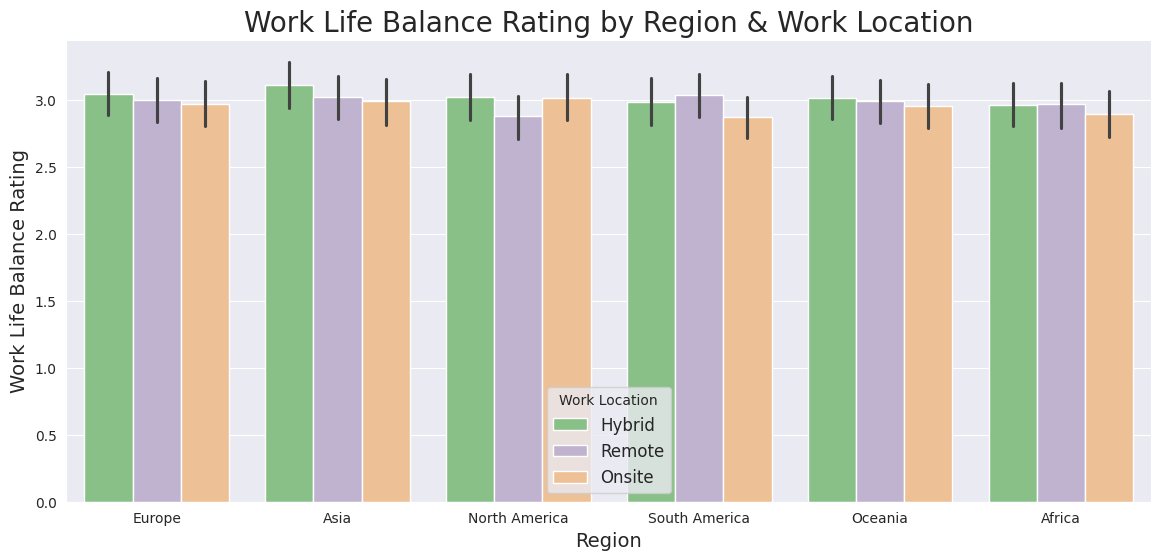

In [172]:
sns.set_style('darkgrid')
sns.set_palette('Accent')
plt.figure(figsize=(14, 6))
sns.barplot(data=data, x='Region', y='Work_Life_Balance_Rating', hue='Work_Location')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Work Life Balance Rating', fontsize=14)
plt.title('Work Life Balance Rating by Region & Work Location', fontsize=20)
plt.legend(title='Work Location', fontsize=12)
plt.show()

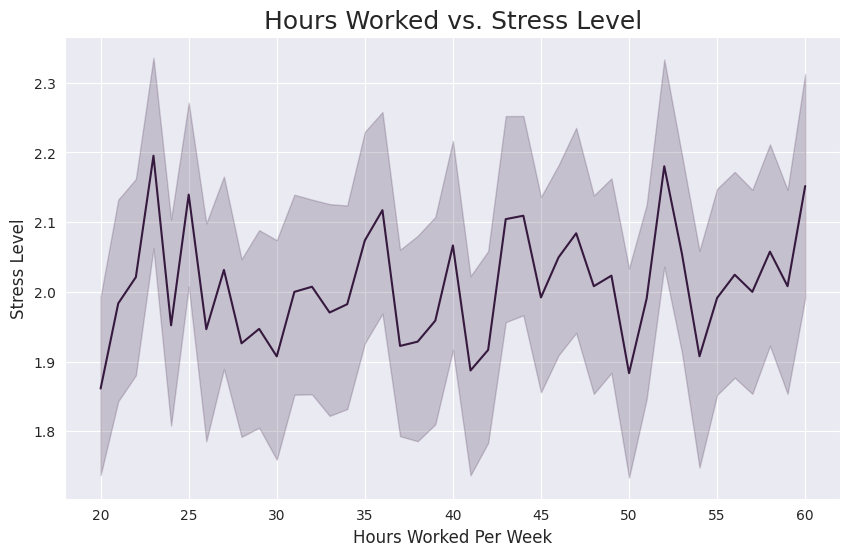

In [193]:
sns.set_style('darkgrid')
sns.set_palette('rocket')
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Hours_Worked_Per_Week', y='Stress_Level')
plt.title('Hours Worked vs. Stress Level', fontsize=18)
plt.xlabel('Hours Worked Per Week', fontsize=12)
plt.ylabel('Stress Level', fontsize=12)
plt.show()

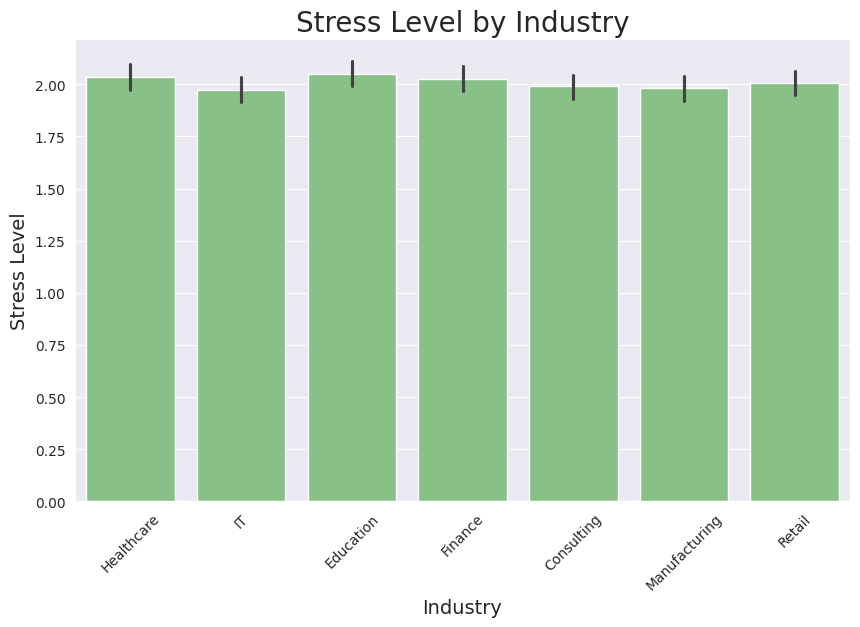

In [194]:
sns.set_style('darkgrid')
sns.set_palette('Accent')
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Industry', y='Stress_Level')
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Stress Level', fontsize=14)
plt.title('Stress Level by Industry', fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [179]:
data.describe() # Descriptive Statistics from the Dataset

,Age,Years_of_Experience,Hours_Worked_Per_Week,Work_Life_Balance_Rating,Stress_Level,Social_Isolation_Rating
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,2.984200,2.008200,2.993800
std,11.296021,10.020412,11.860194,1.410513,0.816251,1.394615
min,22.000000,1.000000,20.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,2.000000,1.000000,2.000000
50%,41.000000,18.000000,40.000000,3.000000,2.000000,3.000000
75%,51.000000,26.000000,50.000000,4.000000,3.000000,4.000000
max,60.000000,35.000000,60.000000,5.000000,3.000000,5.000000


In [189]:
data.groupby('Industry')['Stress_Level'].mean() # Average Stress Level by Industry

,Stress_Level
Industry,
Consulting,1.989706
Education,2.047826
Finance,2.024096
Healthcare,2.035714
IT,1.973190
Manufacturing,1.979502
Retail,2.006887


In [186]:
data.groupby('Work_Location')['Work_Life_Balance_Rating'].mean() # Average Work Life Balance Rating by Work Location

,Work_Life_Balance_Rating
Work_Location,
Hybrid,3.022438
Onsite,2.946854
Remote,2.983081
